<a href="https://colab.research.google.com/github/ruby199/Tensorflow/blob/main/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network Classification with TensorFlow


## Typical architecture of a classification neural network

The word *typical* is on purpose.

Because the architecture of a classification neural network can widely vary depending on the problem you're working on.

However, there are some fundamentals all deep neural networks contain:
* An input layer.
* Some hidden layers.
* An output layer.

Much of the rest is up to the data analyst creating the model.

The following are some standard values you'll often use in your classification neural networks.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

Table 1: Typical architecture of a classification network. Source: Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)


In [1]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.14.0
Notebook last run (end-to-end): 2023-10-24 00:38:46.133575


## Creating data to view and fit


In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

Start with a DataFrame

In [3]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [4]:
# What kind of labels are we dealing with? - binary classification problem

# Check out the different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

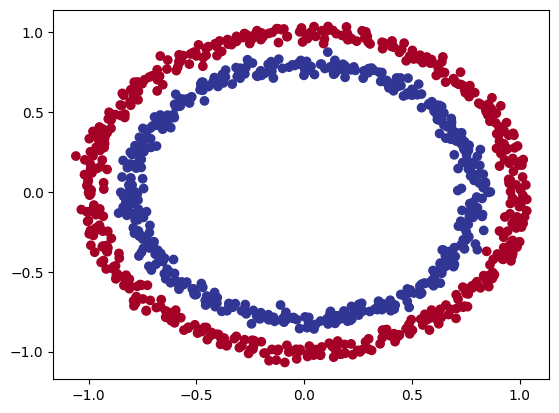

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes


One of the most common issues you'll run into when building neural networks is shape mismatches.

More specifically, the shape of the input data and the shape of the output data.

In our case, we want to input `X` and get our model to predict `y`.

So let's check out the shapes of `X` and `y`.

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# Check how many samples we have
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling


In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [functional](https://www.tensorflow.org/guide/keras/functional) or [sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`).

Let's see these in action using the Sequential API to build a model for our regression data. And then we'll step through each.

In [9]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 11s 8ms/step - loss: 5.6433 - accuracy: 0.4860
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 4.6011 - accuracy: 0.4560
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 3.9951 - accuracy: 0.4690
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 1.0586 - accuracy: 0.5030
Epoch 5/5
32/32 [==============================] - 0s 6ms/step - loss: 0.7154 - accuracy: 0.5020


In [10]:
# Train our model for longer (more chances to look at the data)
model_1.fit(X, y, epochs=200, verbose=0) # set verbose=0 to remove training updates

# Evaluate model_1
model_1.evaluate(X, y)

32/32 [==============================] - 1s 5ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

What if we added an extra layer and trained for a little longer?

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less

In [12]:
# Evaluate the model_2
model_2.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.5000


[0.6937999129295349, 0.5]

In [13]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Still not even as good as guessing (~50% accuracy)... hmm...?

Let's remind ourselves of a couple more ways we can use to improve our models.

## Improving a model



![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*


How about we try adding more neurons, an extra layer and our friend the Adam optimizer?


In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])


# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])


# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 2.8377 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7213 - accuracy: 0.4690
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.4780
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.4780
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4570
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5100
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5030
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.4940
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4380
Epoch 11/

In [15]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Make some visualizations to see what's happening.

To visualize our model's predictions we're going to create a function `plot_decision_boundary()` which:
* Takes in a trained model, features (`X`) and labels (`y`).
* Creates a [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) of the different `X` values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls).


In [16]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


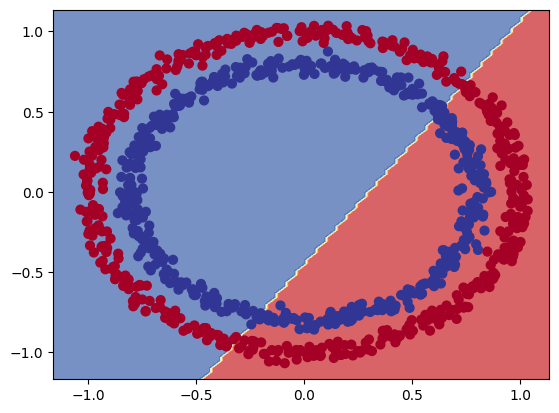

In [17]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

In [18]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)


In [19]:
# # After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
#             y_reg_train,
#             epochs=100)

# # Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Error... we compiled our model for a binary classification problem.

No trouble, we can recreate it for a regression problem.

In [21]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 474.2047 - mae: 474.2047
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 352.6559 - mae: 352.6559
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 235.0500 - mae: 235.0500
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 112.3164 - mae: 112.3164
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 55.0179 - mae: 55.0179
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 87.8526 - mae: 87.8526
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 67.6295 - mae: 67.6295
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 43.7464 - mae: 43.7464
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 49.7965 - mae: 49.7965
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 41.6977 - mae: 41.6977
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 5ms/step


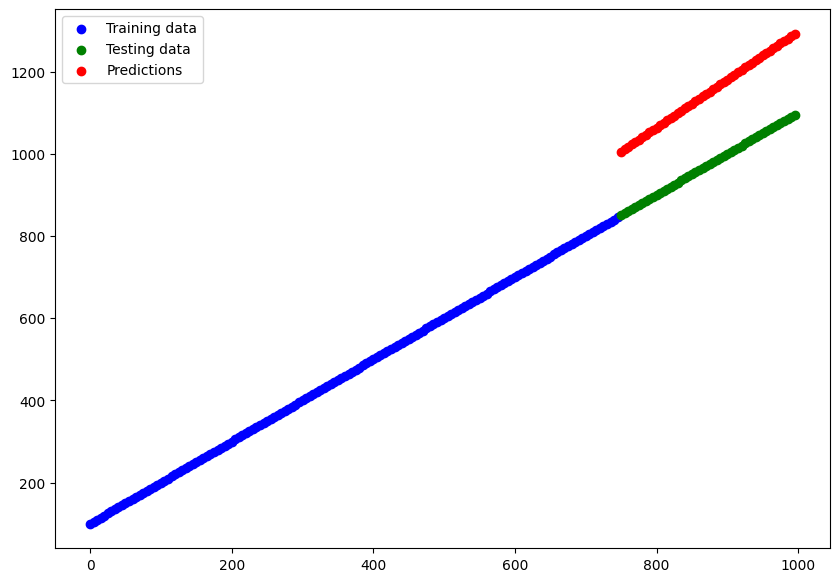

In [22]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

## The missing piece: Non-linearity


In [23]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 5.9000 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 5.8340 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 5.7943 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 5.7019 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6227 - accuracy: 0.4790
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5820 - accuracy: 0.4780
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5683 - accuracy: 0.4790
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 5.5427 - accuracy: 0.4790
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.4844 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3577 - accuracy: 0.4840
Epoch 11/

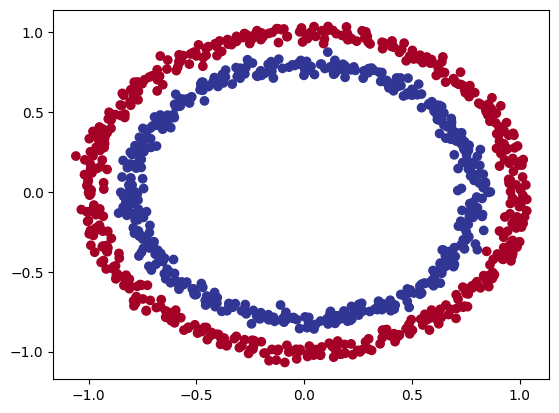

In [24]:
# Check out our data again
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


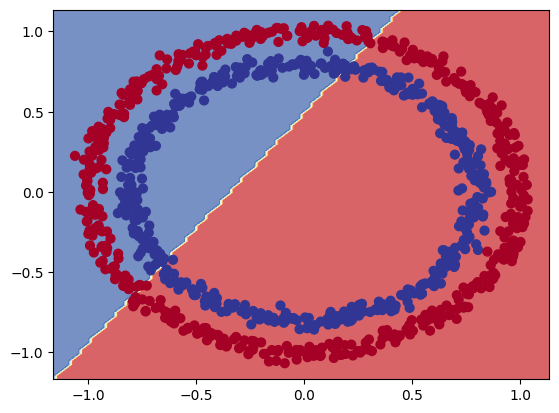

In [25]:
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_4, X, y)

In [26]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 1.8678 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 1.4713 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 1.3659 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 1.2924 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 1.2361 - accuracy: 0.4940
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 1.1909 - accuracy: 0.4500
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 1.1546 - accuracy: 0.4240
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 1.1246 - accuracy: 0.4140
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 1.0995 - accuracy: 0.4270
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 1.0764 - accuracy: 0.4440
Epoch 11/

In [27]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [28]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


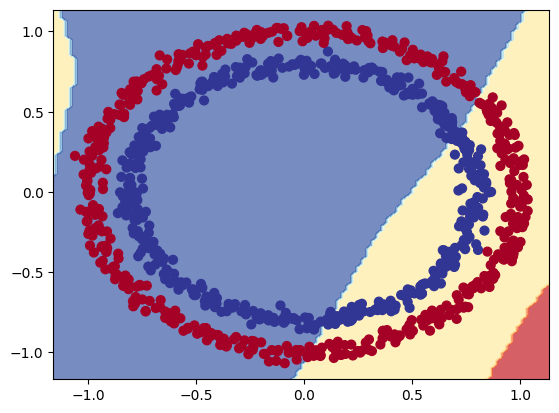

In [29]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)

In [30]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)

In [31]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

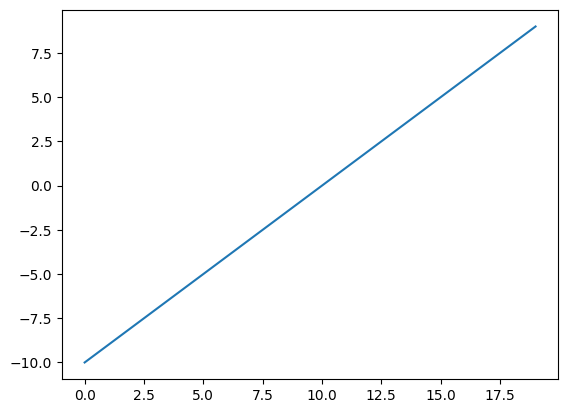

In [32]:
# Visualize our toy tensor
plt.plot(A);

In [33]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

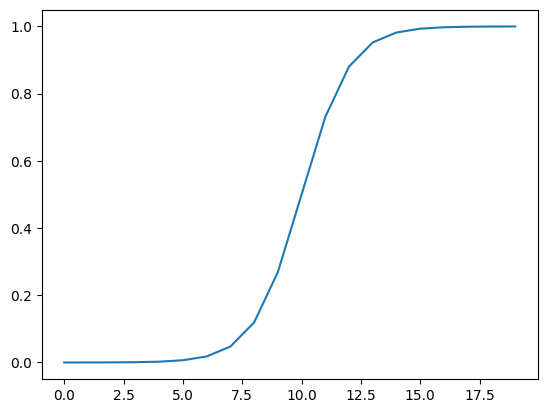

In [34]:
# Plot sigmoid modified tensor
plt.plot(sigmoid(A));

In [35]:
# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

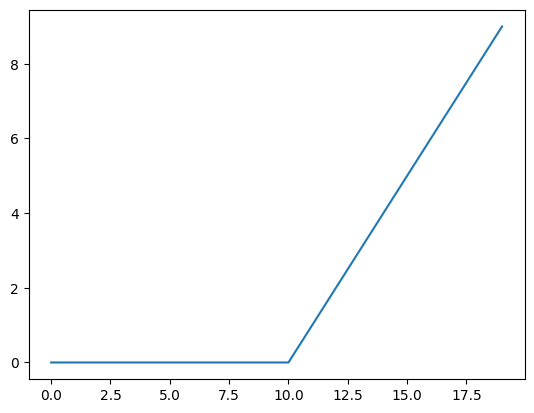

In [36]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [37]:
# Linear - https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear (returns input non-modified...)
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [38]:
# Does the linear activation change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification model


In [39]:
# How many examples are in the whole dataset?
len(X)

1000

In [40]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [41]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7142 - accuracy: 0.4837
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7075 - accuracy: 0.4762
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7035 - accuracy: 0.4750
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7003 - accuracy: 0.4638
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.4400
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.4100
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.4437
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4650
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4975
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.4988
Epoch 11/

In [42]:
# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.2590 - accuracy: 0.9500
Model loss on the test set: 0.259027361869812
Model accuracy on the test set: 95.00%


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


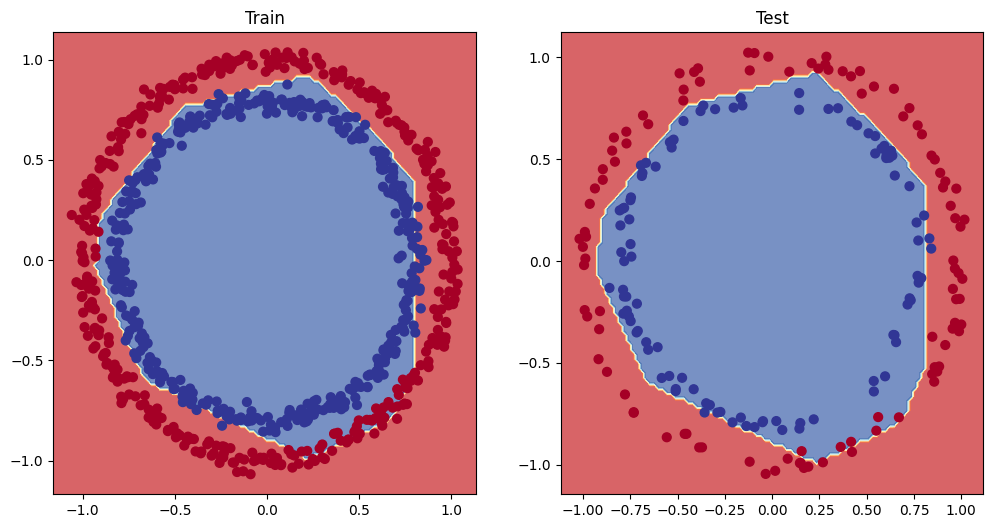

In [43]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

### Plot the loss curves

Looking at the plots above, we can see the outputs of our model are very good.

But how did our model go whist it was learning?

As in, how did the performance change everytime the model had a chance to look at the data (once every epoch)?

To figure this out, we can check the **loss curves** (also referred to as the **learning curves**)

You might've seen we've been using the variable `history` when calling the `fit()` function on a model([`fit()` returns a `History` object](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit)).

In [44]:
# You can access the information in the history variable using the .history attribute
pd.DataFrame(history.history)

,loss,accuracy
0,0.714186,0.48375
1,0.707510,0.47625
2,0.703490,0.47500
3,0.700254,0.46375
4,0.698289,0.44000
...,...,...
95,0.311525,0.90500
96,0.308980,0.91125
97,0.305731,0.91250
98,0.301946,0.90625


Text(0.5, 1.0, 'Model_8 training curves')

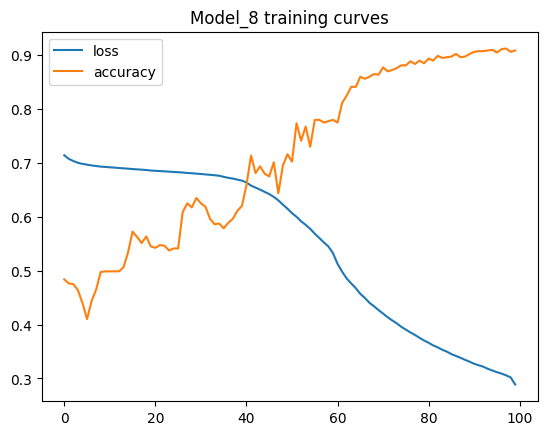

In [45]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

ideal shape:
- loss curve to go down
- accuracy to go down

> 🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:


To do so, we're going to use the following:
* A [learning rate **callback**](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler).
   * You can think of a callback as an extra piece of functionality you can add to your model *while* its training.
* Another model (we could use the same ones as above, we we're practicing building models here).
* A modified loss curves plot.

> 🔑 **Note:** The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the [Adam optimizer's](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) default settings can usually get good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.

In [46]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.7124 - accuracy: 0.5088 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7117 - accuracy: 0.5125 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7110 - accuracy: 0.5100 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7103 - accuracy: 0.5125 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7095 - accuracy: 0.5113 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7088 - accuracy: 0.5050 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7079 - accuracy: 0.5075 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7070 - accuracy: 0.5000 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

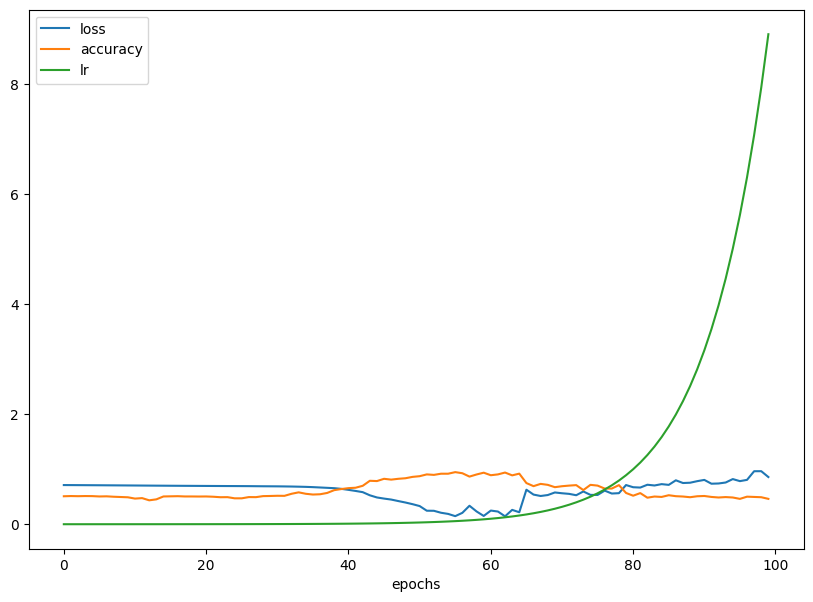

In [47]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

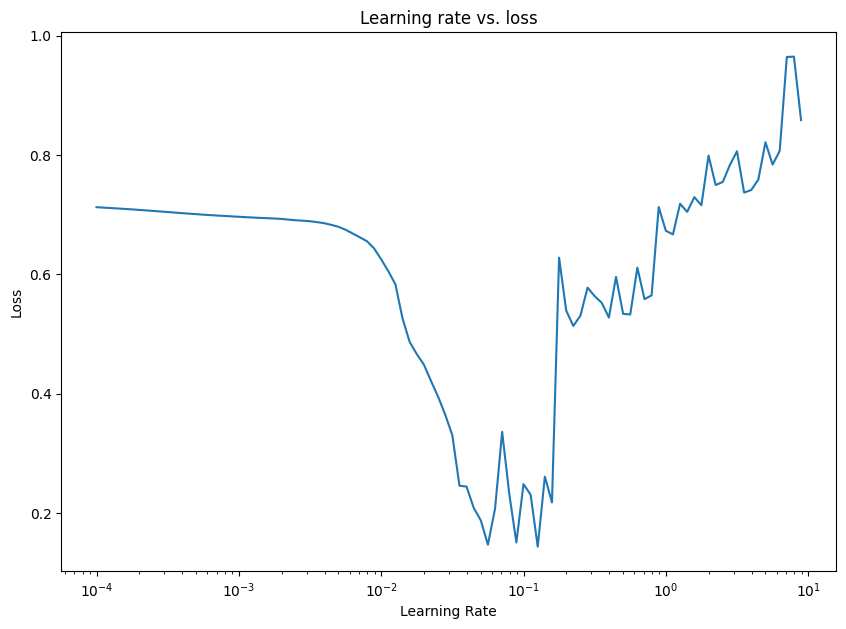

In [48]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

To figure out the ideal value of the learning rate (at least the ideal value to *begin* training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

In this case, our ideal learning rate ends up between `0.01` ($10^{-2}$) and `0.02`.

![finding the ideal learning rate by plotting learning rate vs. loss](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-learning-rate-vs-loss.png)

*The ideal learning rate at the start of model training is somewhere just before the loss curve bottoms out (a value where the loss is still decreasing).*

In [49]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [50]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 4ms/step - loss: 0.6916 - accuracy: 0.5075
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5175
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.5425
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6663 - accuracy: 0.5512
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6576 - accuracy: 0.5713
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6488 - accuracy: 0.5850
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6405 - accuracy: 0.5962
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6206 - accuracy: 0.6187
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5956 - accuracy: 0.6513
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5619 - accuracy: 0.6875
Epoch 11/20
25/25 [

Nice! With a little higher learning rate (`0.02` instead of `0.01`) we reach a higher accuracy than `model_8` in less epochs (`20` instead of `25`).

In [51]:
# Evaluate model 10 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2590 - accuracy: 0.9500


[0.259027361869812, 0.949999988079071]

In [52]:
# Evaluate model 8 on the test datset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2590 - accuracy: 0.9500


[0.259027361869812, 0.949999988079071]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


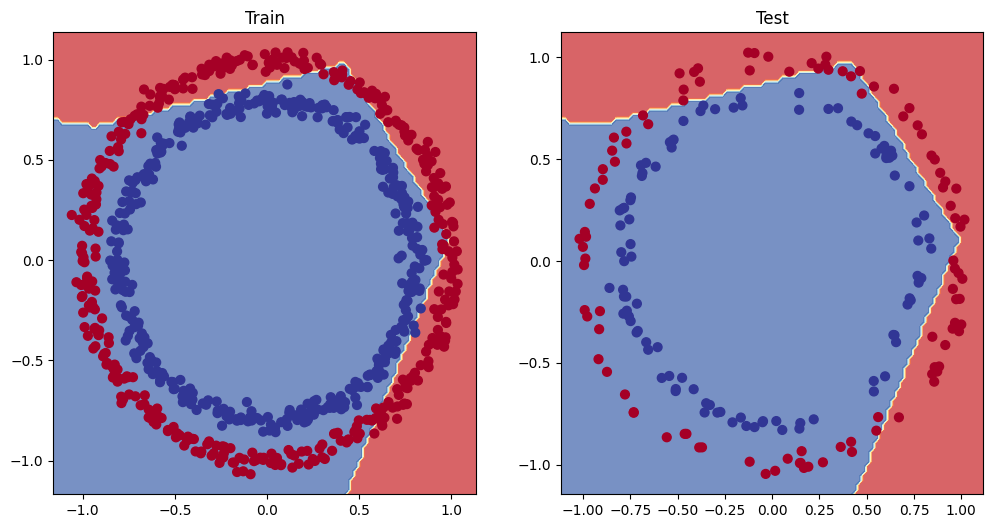

In [53]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

### More classification evaluation methods

| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |


In [54]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuyracy on the test set: {(accuracy * 100) : .2f}%")

7/7 [==============================] - 0s 5ms/step - loss: 0.4988 - accuracy: 0.7500
Model loss on the test set: 0.49878042936325073
Model accuyracy on the test set:  75.00%


In [59]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# ValueError: Classification metrics can't handle a mix of binary and continuous targets
# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
# confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 4ms/step


In [60]:
# View the first 10 predictions
y_preds[:10]

array([[0.66869974],
       [0.66869974],
       [0.66869974],
       [0.66869974],
       [0.666631  ],
       [0.66869974],
       [0.66869974],
       [0.006118  ],
       [0.66869974],
       [0.01581351]], dtype=float32)

In [61]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

We need to get our predictions into the binary format (0 or 1).

In [62]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [63]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[51, 50],
       [ 0, 99]])

Make a function to make our confusion matrix a little more visual

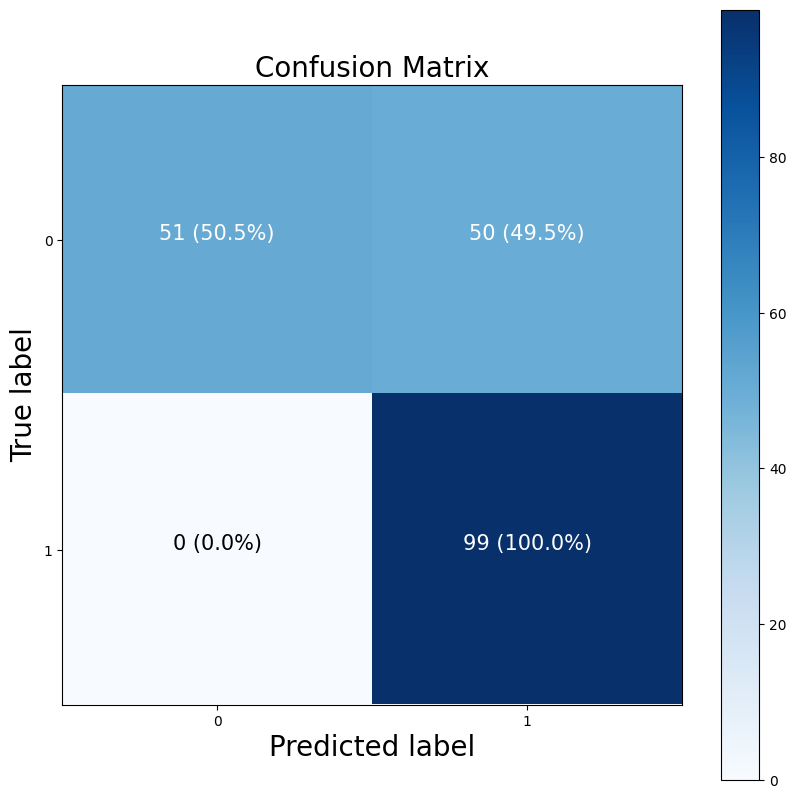

In [64]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

## Working with a larger example (multiclass classification)

When you have more than two classes as an option, this is known as multiclass classification.
'
The good thing for us is TensorFlow has a multiclass classication dataset known as Fashion MNIST built-in. We can import it using the [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) module.


In [65]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [66]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [67]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [68]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

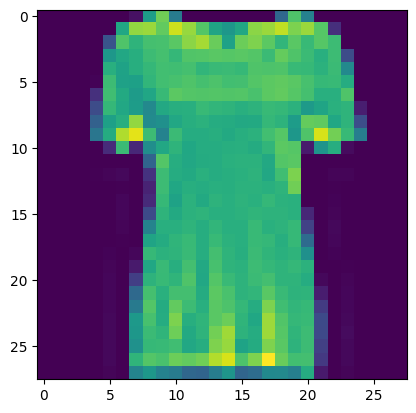

In [69]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[10]);

In [70]:
# Check our samples label
train_labels[7]

2

In [71]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

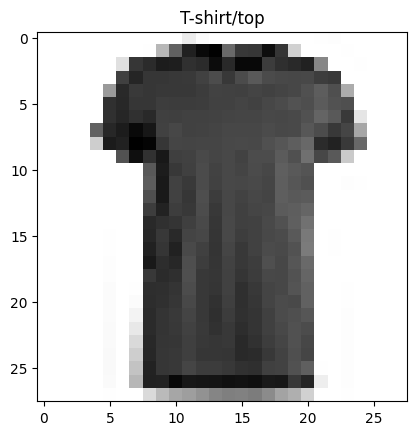

In [72]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

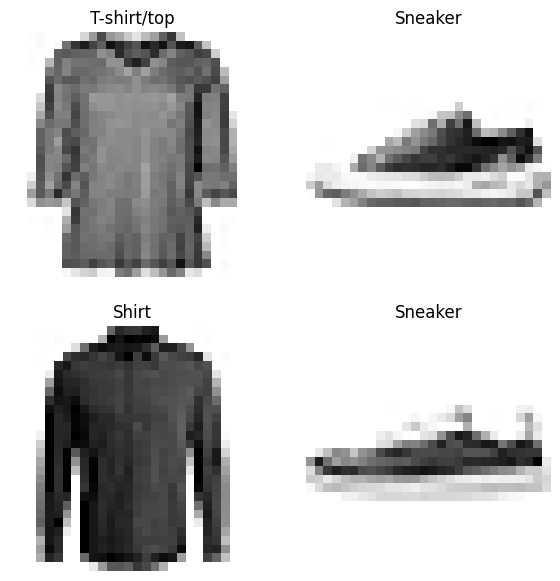

In [73]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building muti-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the height and width of our images)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrosstentropy()
* Output layer activation = Softmax (not sigmoid)


In [74]:
train_data[0].shape

(28, 28)

In [75]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3139 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accurac

In [76]:
# Check the shapes of our model
# Note: the "None" in (None, 784) is for batch_size, we'll cover this in a later module
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 4)                 3140      
                                                                 
 dense_31 (Dense)            (None, 4)                 20        
                                                                 
 dense_32 (Dense)            (None, 4)                 20        
                                                                 
 dense_33 (Dense)            (None, 10)                50        
                                                                 
Total params: 3230 (12.62 KB)
Trainable params: 3230 (12.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks perfer data to be scaled (or normalized) this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [78]:

# We can get our training and testing data beteen 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [79]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.4479 - accuracy: 0.1065 - val_loss: 2.2778 - val_accuracy: 0.1134
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.1678 - accuracy: 0.1620 - val_loss: 1.9119 - val_accuracy: 0.2345
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.7034 - accuracy: 0.3108 - val_loss: 1.6019 - val_accuracy: 0.3414
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4507 - accuracy: 0.4075 - val_loss: 1.3657 - val_accuracy: 0.4273
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.3427 - accuracy: 0.4353 - val_loss: 1.4420 - val_accuracy: 0.3790
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2997 - accuracy: 0.4441 - val_loss: 1.2842 - val_accuracy: 0.4502
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2800 - accuracy: 0.4493 - val_loss: 1.2917 - val_accurac

> 🔑 **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1)

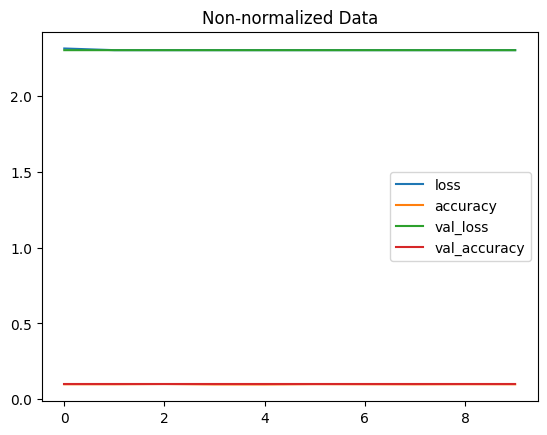

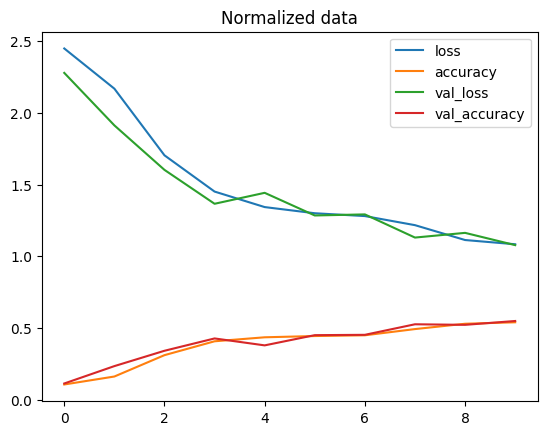

In [80]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria(e.g. same architecture but different data or same data but different architecture)

In [81]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 3ms/step - loss: 2.3629 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3029 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1000 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

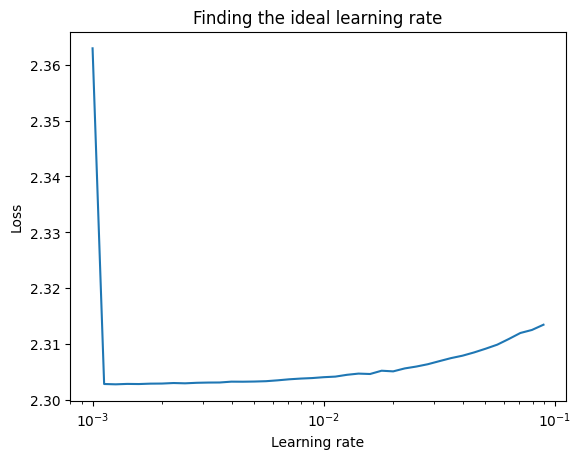

In [82]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [83]:
# Let's refit a model with the ideal learning rate
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 2.1806 - accuracy: 0.1687 - val_loss: 2.0772 - val_accuracy: 0.1910
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0259 - accuracy: 0.2045 - val_loss: 1.9792 - val_accuracy: 0.2186
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9061 - accuracy: 0.2520 - val_loss: 1.7251 - val_accuracy: 0.3119
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6162 - accuracy: 0.3308 - val_loss: 1.5455 - val_accuracy: 0.3196
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4426 - accuracy: 0.3686 - val_loss: 1.3758 - val_accuracy: 0.3994
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3674 - accuracy: 0.3950 - val_loss: 1.3599 - val_accuracy: 0.4092
Epoch 7/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3058 - accuracy: 0.4322 - val_loss: 1.2708 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:

* Evaluate its performance using other classification metrics (such as a [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) or [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)).
* Assess some of its predictions (through visualizations).
* Improve its accuracy (by training it for longer or changing the architecture).
* Save and export it for use in an application.

In [84]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [85]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 3ms/step


array([[1.6639898e-06, 2.1539143e-05, 1.9007856e-17, 8.0675363e-07,
        9.1483983e-14, 5.2646697e-02, 1.4049025e-13, 9.6522309e-02,
        3.3290940e-04, 8.5047400e-01],
       [1.6664937e-02, 1.7450264e-05, 3.6202058e-02, 2.9833263e-03,
        1.8585797e-02, 1.0587589e-02, 6.5106370e-02, 1.5428410e-03,
        7.9491746e-01, 5.3392120e-02],
       [2.5292314e-04, 9.8339856e-01, 8.1275417e-08, 1.6346293e-02,
        1.7604605e-06, 7.6018538e-20, 4.5378846e-07, 0.0000000e+00,
        2.2762149e-18, 2.6958572e-38],
       [6.1096862e-04, 9.7093922e-01, 3.4574697e-07, 2.8441498e-02,
        6.1288215e-06, 1.1963349e-18, 1.7333224e-06, 0.0000000e+00,
        3.5886692e-17, 4.9982401e-36],
       [7.0026219e-02, 6.9967231e-05, 3.3148766e-01, 1.7335564e-02,
        2.3976862e-01, 1.3395138e-03, 2.9791144e-01, 4.3286875e-08,
        4.1362755e-02, 6.9823454e-04]], dtype=float32)

In [93]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 8, 1, 1, 2, 1, 2, 2, 9, 7])

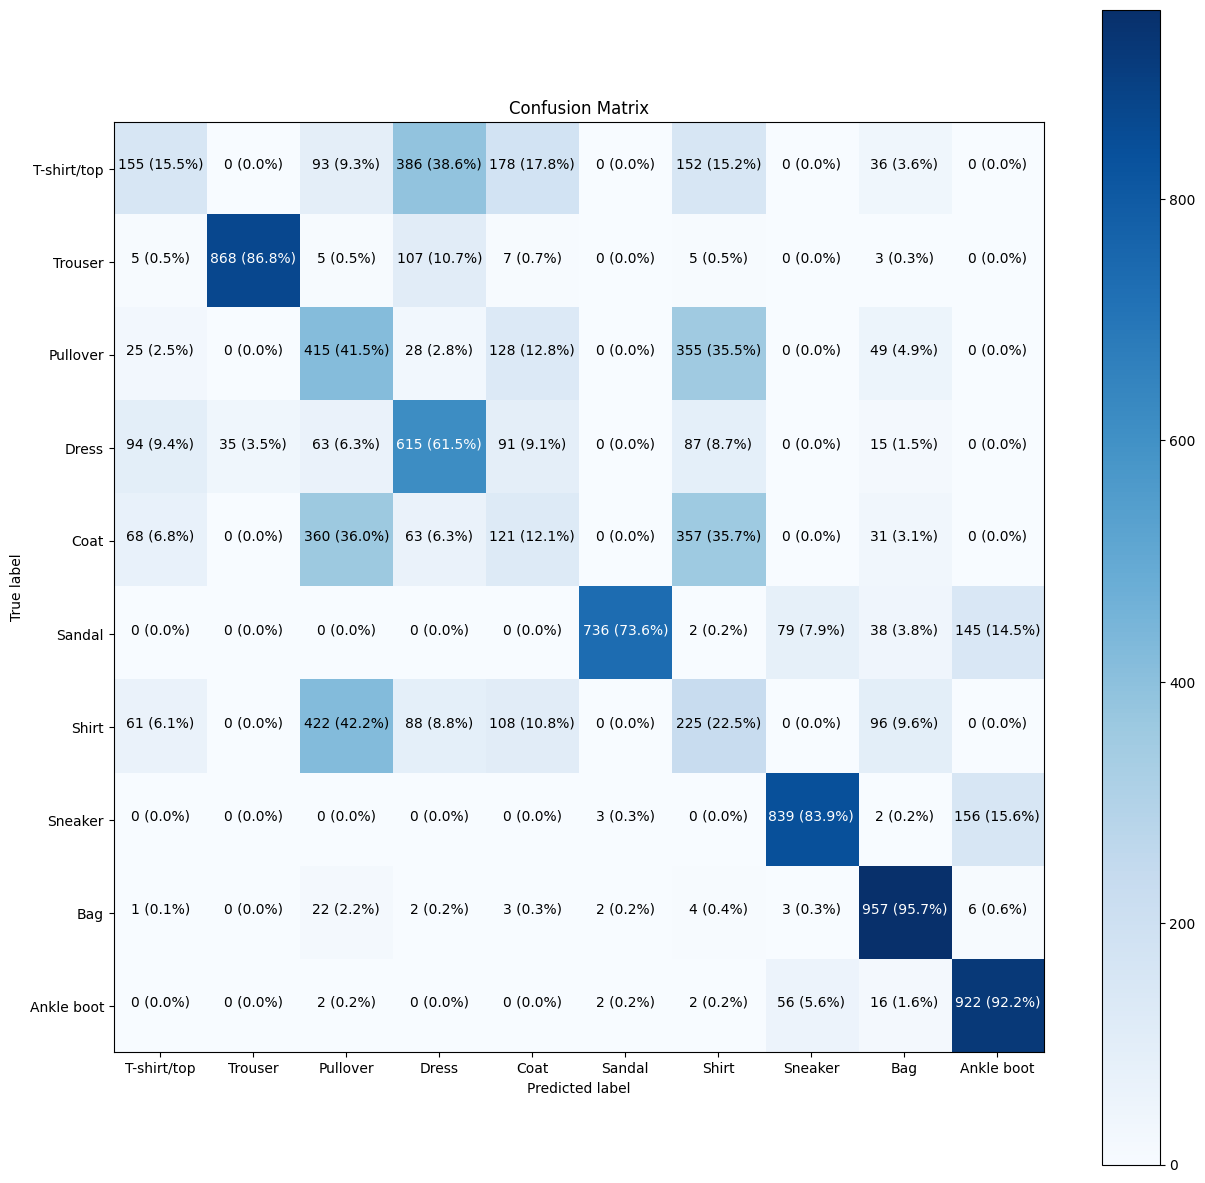

In [94]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)



> 🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your model.



In [95]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 17ms/step


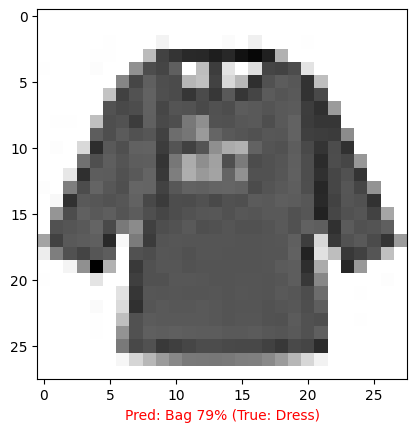

In [96]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [97]:
# Find the layers of our most recent model
model_14.layers

In [98]:
# Extract a particular layer
model_14.layers[1]

In [99]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[ 0.5006348 , -0.03857502, -0.00898509, -0.07096301],
        [ 0.71334904,  0.05484575, -0.00091004,  0.47604012],
        [ 0.08304763, -0.06879019, -0.01613919,  0.44088158],
        ...,
        [-0.05832688,  0.32657537, -0.01748086, -0.09068295],
        [-0.14467439,  0.0643215 , -0.05476834, -0.20529522],
        [ 0.12145466, -0.05422838,  0.01005745, -0.3433822 ]],
       dtype=float32),
 (784, 4))


![neural network supervised learning weight updates](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-fashion-mnist-learning.png)
*Example workflow of how a supervised neural network starts with random weights and updates them to better represent the data by looking at examples of ideal outputs.*

### Now let's check out the bias vector..

In [102]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([ 1.7446516 ,  2.0997999 , -0.02596343,  4.7752333 ], dtype=float32),
 (4,))

In [103]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[155,   0,  93, 386, 178,   0, 152,   0,  36,   0],
       [  5, 868,   5, 107,   7,   0,   5,   0,   3,   0],
       [ 25,   0, 415,  28, 128,   0, 355,   0,  49,   0],
       [ 94,  35,  63, 615,  91,   0,  87,   0,  15,   0],
       [ 68,   0, 360,  63, 121,   0, 357,   0,  31,   0],
       [  0,   0,   0,   0,   0, 736,   2,  79,  38, 145],
       [ 61,   0, 422,  88, 108,   0, 225,   0,  96,   0],
       [  0,   0,   0,   0,   0,   3,   0, 839,   2, 156],
       [  1,   0,  22,   2,   3,   2,   4,   3, 957,   6],
       [  0,   0,   2,   0,   0,   2,   2,  56,  16, 922]])

In [104]:
# Can now calculate the number of paramters in our model
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_41 (Dense)            (None, 4)                 3140      
                                                                 
 dense_42 (Dense)            (None, 4)                 20        
                                                                 
 dense_43 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


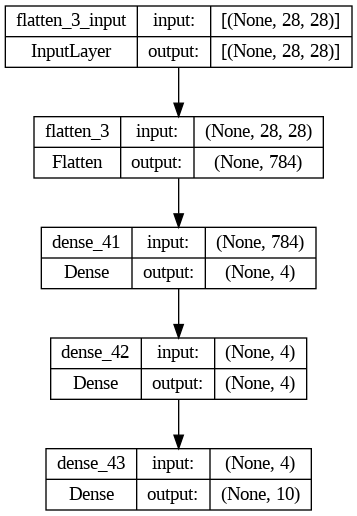

In [105]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layers
plot_model(model_14, show_shapes=True)